# Plotting

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

## E.g. Anscombe's quartet

In [24]:
anscombe = sns.load_dataset('anscombe')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


Matplotlib is Python's fundamental plotting library

In [25]:
# create a subset of the data: dataset 1
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

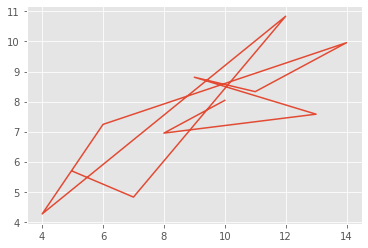

In [26]:
plt.plot(dataset_1['x'], dataset_1['y'])

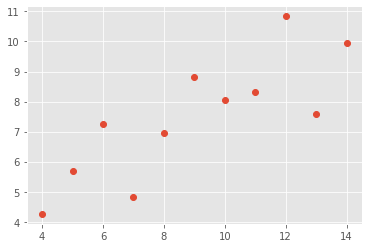

In [27]:
# 'o' parameter = use point instead of draw lines
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

Using Figure and Subplots

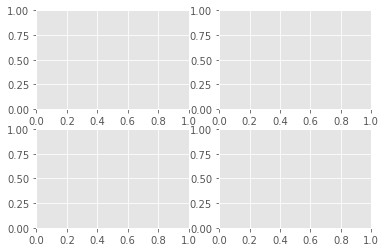

In [28]:
# create the entire figure where our subplots will go
fig = plt.figure()

# tell the figure how the subplots should be laid out
# in the example, we will have
# 2 row of plots, each row will have 2 plots

# subplot has 2r 2c, plot location 1
axes1 = fig.add_subplot(2, 2, 1)

axes2 = fig.add_subplot(2, 2, 2)

axes3 = fig.add_subplot(2, 2, 3)

axes4 = fig.add_subplot(2, 2, 4)

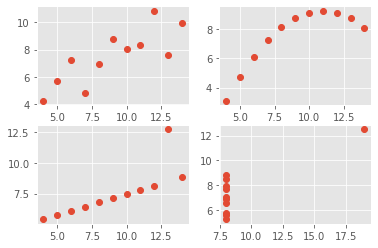

In [29]:
# use plot method on each axis to create our plot

# add a plot to each of the axes created above
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

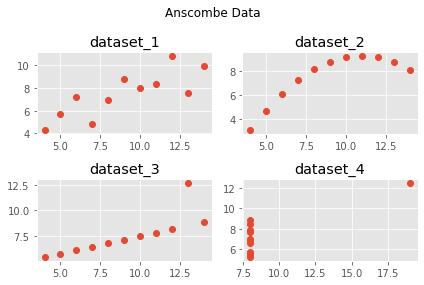

In [33]:
# add a small title to each subplot
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

# add a title for the entire figure
fig.suptitle('Anscombe Data')

# use a tight layout
fig.tight_layout()

fig

## `matplotlib`

In [34]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
tips[tips['sex'] == 'Male'].describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


### Univariate (single variable)

#### Histograms


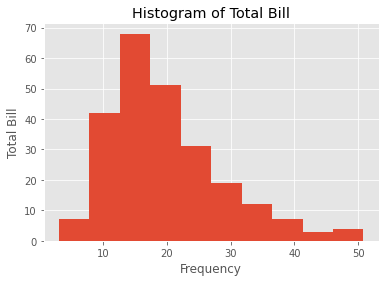

In [35]:
fig = plt.figure()

axes1 = fig.add_subplot(1, 1, 1)

# Plot 'total_bill' column, into 10 equi-width bin
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig.show()

### Bivariate (two variable)

#### Scatterplot (continuous-continuous)

Used when a continuous variable is plotted against another continuos variable

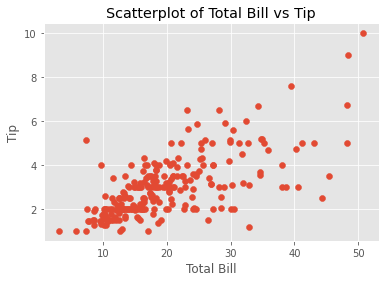

In [37]:
scatter_plot = plt.figure()

axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

scatter_plot.show()

#### Boxplot (discrete-continuous)

Used when a discrete variable is plotted against a continuos variable

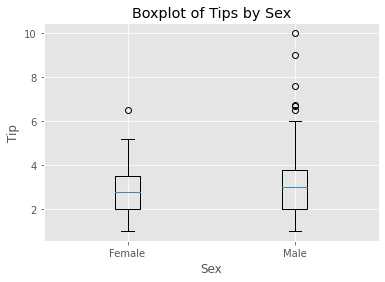

In [38]:
boxplot = plt.figure()

axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot(
    # first argument is the data
    # multiple pieces of data --> put into list
    [ tips[tips['sex'] == 'Female']['tip'],
      tips[tips['sex'] == 'Male']['tip'] ],
    # we can then pass in an optional labels parameter
    # to label the data we passed
    labels=['Female', 'Male']
)
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

boxplot.show()

### Multivariate

Tricky, no panacea or template for every case

As an example, use previous scatterplot. 

Suppose add another variable `sex` (3rd) --> an option: color based on value

4th variable, options below:

  - add size to dots
    downsides: human eye are not very good at differentiating area, clutter
    reduce clutter --> add transparency to points
  
Colors are much easier to distinguish than changes in size


,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,pink
1,10.34,1.66,Male,No,Sun,Dinner,3,blue
2,21.01,3.50,Male,No,Sun,Dinner,3,blue
3,23.68,3.31,Male,No,Sun,Dinner,2,blue
4,24.59,3.61,Female,No,Sun,Dinner,4,pink
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,blue
240,27.18,2.00,Female,Yes,Sat,Dinner,2,pink
241,22.67,2.00,Male,Yes,Sat,Dinner,2,blue
242,17.82,1.75,Male,No,Sat,Dinner,2,blue


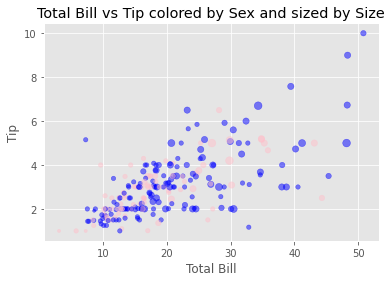

In [43]:
# create a color variable based on sex
def recode_sex(sex):
    if sex == 'Female':
        return 'pink'
    else:
        return 'blue'

tips['sex_color'] = tips['sex'].apply(recode_sex)

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],

    # set the size of the dots based on party size
    # we multiply the values by 10 to make the points bigger
    # and to emphasize the differences
    s=tips['size'] * 10,

    # set the color for the sex
    c=tips['sex_color'],

    # set the alpha value so points are more transparent
    # this helps with overlapping pooints
    alpha=0.5
)

axes1.set_title('Total Bill vs Tip colored by Sex and sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

scatter_plot.show()
tips

## `seaborn`

`seaborn` builds on `matplotlib`. It provides a high-level interface for statistical graphics, producing prettier and more complex visualizations with fewer lines of code

In [44]:
import seaborn as sns

In [47]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Univariate (single variable)

#### Histograms

/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


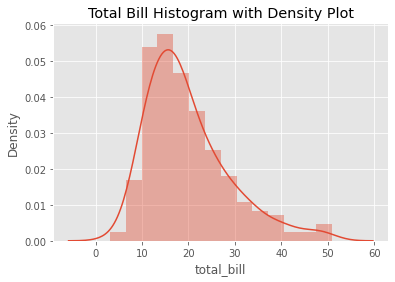

In [52]:
# this subplots function is a shortcut for
# creating seperate figure objects and
# adding individual subplots (axes) to the figure
hist, ax = plt.subplots()

# use the distplot function from seaborn to create plot
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

plt.show()

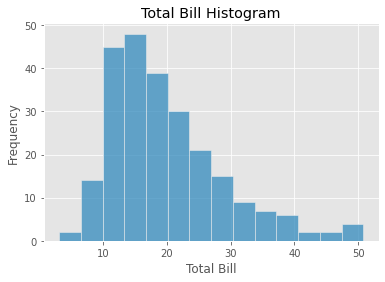

In [64]:
# this subplots function is a shortcut for
# creating seperate figure objects and
# adding individual subplots (axes) to the figure
hist, ax = plt.subplots()

# use the distplot function from seaborn to create plot
# ax = sns.distplot(tips['total_bill'], kde=False)
# distplot DEPRECATED, use histplot for this case
ax = sns.histplot(tips['total_bill'])
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

plt.show()

#### Density Plot (Kernel Density Estimation)

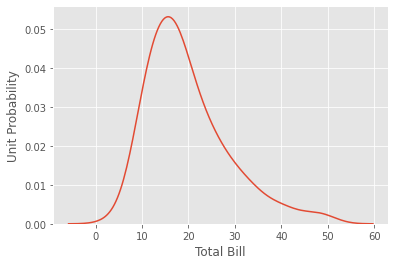

In [63]:
den, ax = plt.subplots()
# ax = sns.distplot(tips['total_bill'], hist=False)
# distplot DEPRECATED, use kdeplot for this case
ax = sns.kdeplot(tips['total_bill'])
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')
plt.show()

#### Rug Plot

1D representation of a variable's distribution.
Typ. used with other plots to enhance visualization

/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


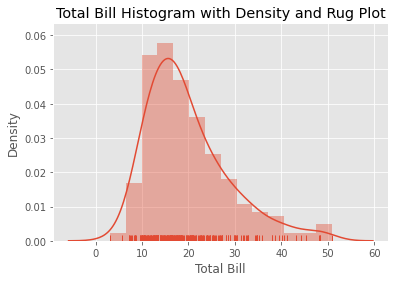

In [68]:
hist_den_rug, ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
# ax = sns.displot(tips['total_bill'], rug=True, kind='hist')
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')
plt.show()

#### Count Plot (Bar Plot)

similar to histograms. instead of binning values to produce distribution, bar plots count discrete variables

/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


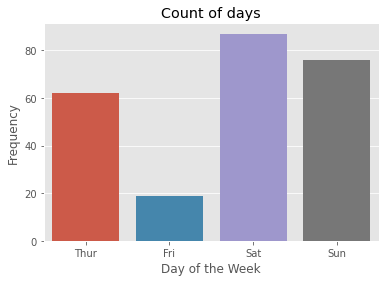

In [69]:
count, ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')
plt.show()

### Bivariate Data

#### Scatterplot

There are >1 ways to create scatterplot in seaborn.

No explicit `scatter`, use `regplot` (scatterplot with regression line)

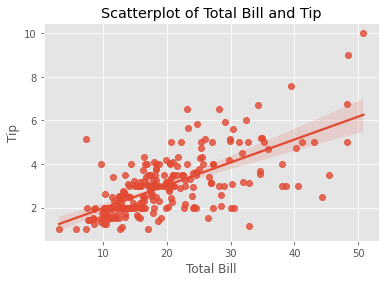

In [70]:
scatter, ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()

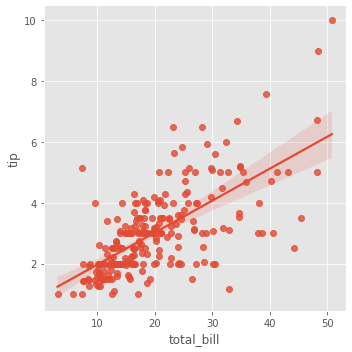

In [71]:
fig = sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

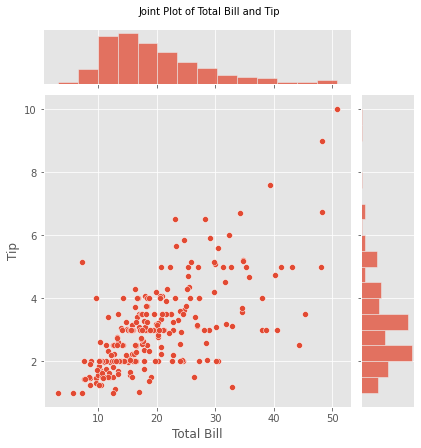

In [72]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')

joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

#### Hexbin Plot

kinda like Density Plot and Histogram,
we have Scatterplot and Hexbin Plot

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

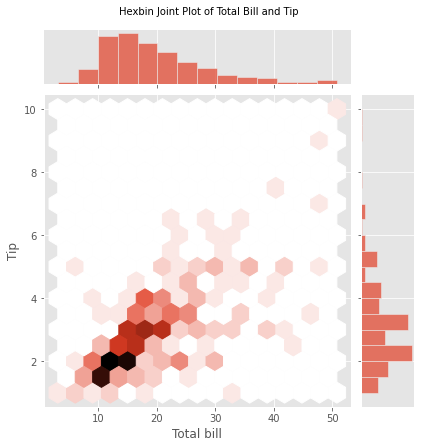

In [73]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

#### 2D Density Plot

similar to `sns.kdeplot` except 2D

/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


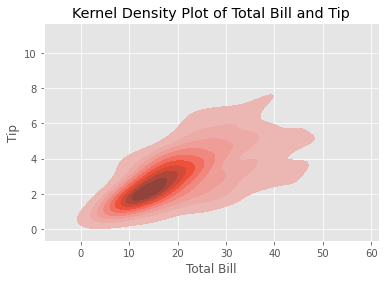

In [76]:
kde, ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'], data2=tips['tip'], shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()

#### Bar Plot

can also be used to show multiple variables. 

by default, barplot will calculate the mean, but can be customized using `estimator` parameter.
for example, `numpy.std` function to calculate the standard deviation

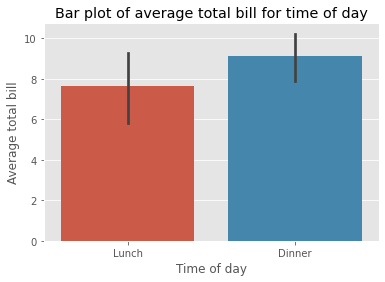

In [81]:
bar, ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips, estimator=np.std)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')
plt.show()

#### Boxplot

show multiple statistics:

  - min
  - 1st quartile
  - median = 2nd quartile
  - 3rd quartile
  - max
  - (if applicable), outliers (beyond median +- 1.5*IQR)

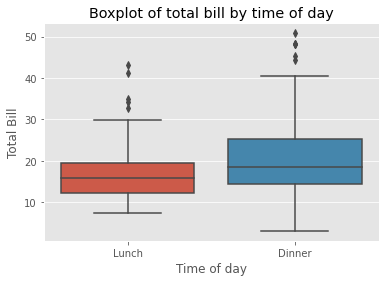

In [82]:
box, ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')
plt.show()

#### Violin Plot

Violin plot == Boxplot + underlying distribution of data

Essentially, plot the "boxes" as a kernel density estimation

Retains more visual information about your data, since summary statistics misleads


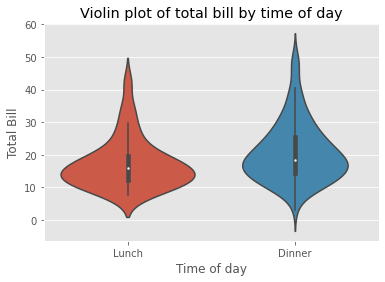

In [83]:
violin, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')
plt.show()

#### Pairwise Relationships

plots a scatterplot between each pair of variables, and a histogram for the univariate data

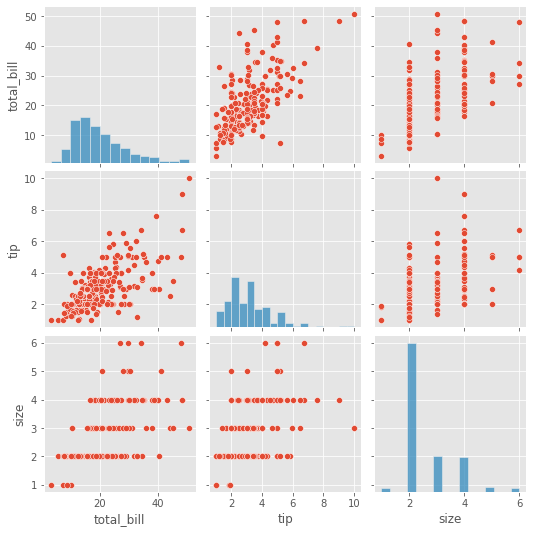

In [84]:
fig = sns.pairplot(tips)

drawback: redundant information <-- upper-right and bottom-left information is same but mirrored

/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/h

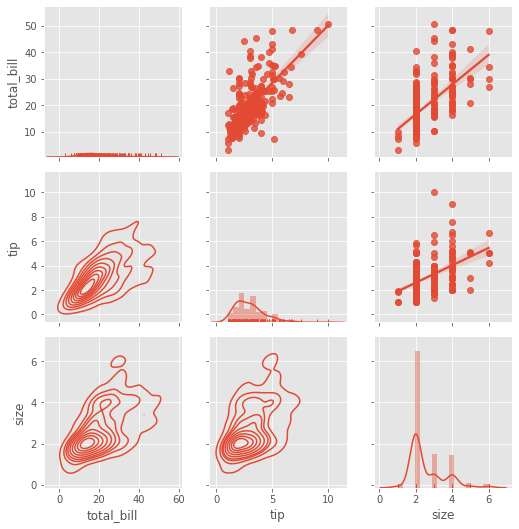

In [85]:
pair_grid = sns.PairGrid(tips)

pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)

plt.show()

### Multivariate Data

no de facto template for plotting multivariate data.
possible ways: color, size, shape to distinguish data within the plot

#### Colors

with `violinplot`: pass `hue` parameter 

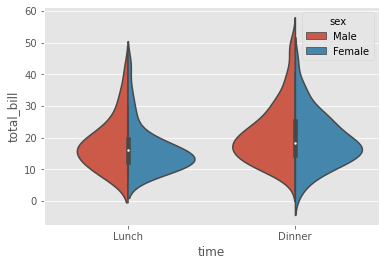

In [86]:
violin, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)
plt.show()

with `lmplot`: pass `hue` parameter

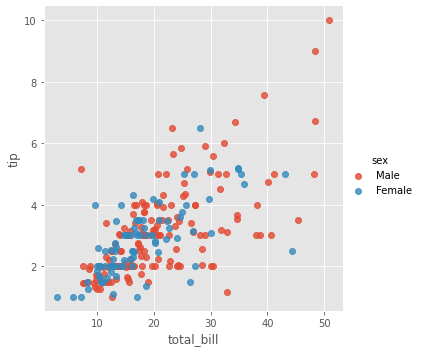

In [87]:
# not the use of lmplot instead of regplot here
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)
plt.show()

with `pairplot`: pass `hue` parameter

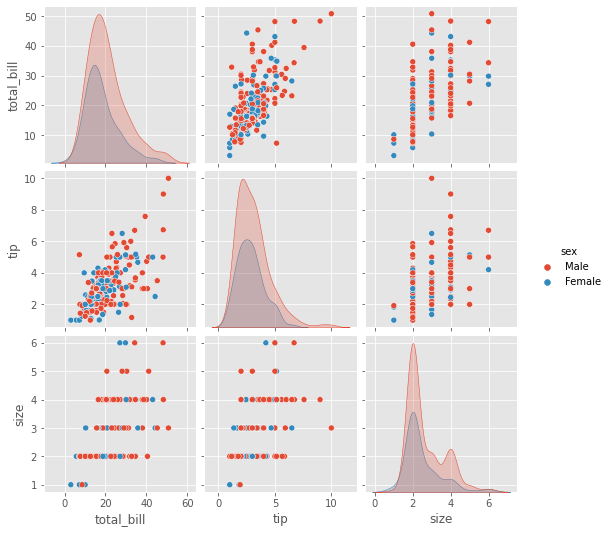

In [88]:
fig = sns.pairplot(tips, hue='sex')

#### Size and Shape

should be used sparingly <-- human eye is not very good at comparing area

`scatterplot` with size

In [103]:
# https://stackoverflow.com/questions/68457453/seaborn-lmplot-raises-valueerror-when-set-both-hue-and-scatter-kwss-s
# https://github.com/mwaskom/seaborn/issues/2621
# Due to lmplot drawing seperate scatterplots for each level of `hue` + scatter_kws passed directly to `scatter`
# --> vectors are going to have different length
# scatter = sns.lmplot(
#     x='total_bill', y='tip', 
#     data=tips, 
#     fit_reg=False, 
#     hue='sex', 
#     scatter_kws={'s': tips['size'] * 10}
# )

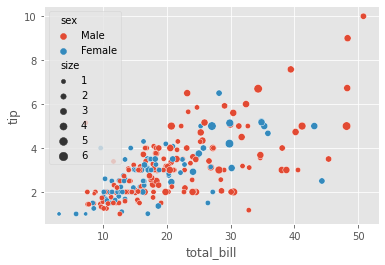

In [102]:
# Use this instead
scatter = sns.scatterplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='sex',
    size='size'
)
plt.show()

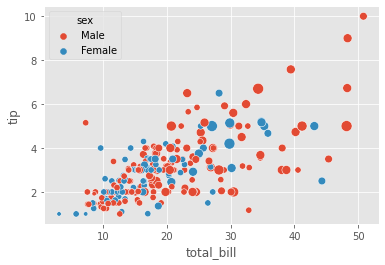

In [101]:
scatter = sns.scatterplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='sex',
    # s kwargs are not in scatterplot function, therefore is passed down to matplotlib.scatter()
    s=tips['size'].mul(20)
)
plt.show()

`scatterplot` with Shape

In [106]:
# scatter = sns.lmplot(
#     x='total_bill',
#     y='tip',
#     data=tips,
#     fit_reg=False,
#     hue='sex',
#     markers=['o', 'x'],
#     scatter_kws={'s': tips['size'] * 10}
# )
# plt.show()

# Also does not work, see code block in previous section

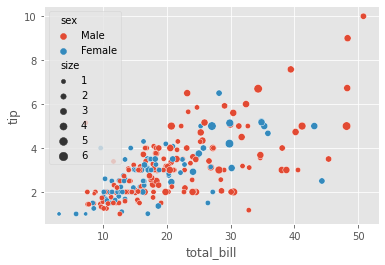

In [108]:
scatter = sns.scatterplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='sex',
    markers=['o', 'x'],
    size='size'
)

##### `relplot` with size/shape

`relplot` uses `scatterplot` as one of its underlying function.
usage is similar to above.

See:
  - https://seaborn.pydata.org/generated/seaborn.relplot.html
  - https://stackoverflow.com/questions/68457453/seaborn-lmplot-raises-valueerror-when-set-both-hue-and-scatter-kwss-s

#### Facets (figure() + subplot()-like)

Facets:
  - to show more variables
  - multiple plots over categorical var

similar to using `plt.figure()` and `.add_subplot()`

figure-level function (e.g. `lmplot`)

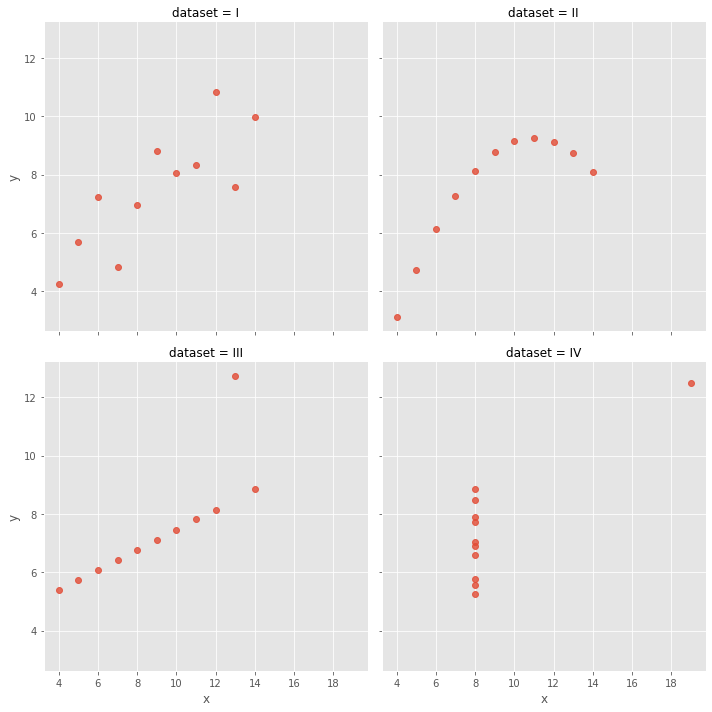

In [109]:
anscombe_plot = sns.lmplot(
    x='x', y='y', data=anscombe,
    fit_reg=False,
    # determines what var the plot will facet by
    col='dataset',
    # 2 columns, if none provided --> same row
    col_wrap=2
)

axes-level function (e.g. `regplot`, `distplot`, ...)

axes-level function will not have `col` and `col_wrap` params for faceting.
must use `FacetGrid` instead: supply facet var + individual plot code/facet

/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/h

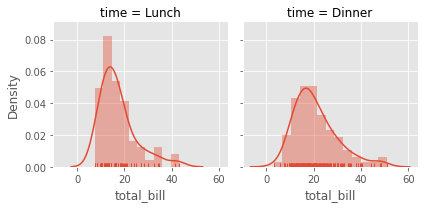

In [112]:
# create the FacetGrid
facet = sns.FacetGrid(tips, col='time')
# for each value in time, plot a histogram of total bill
facet.map(sns.distplot, 'total_bill', rug=True)

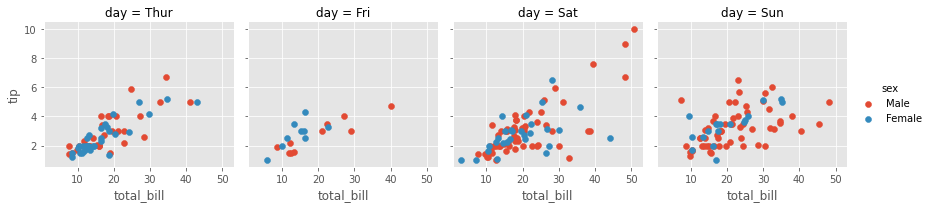

In [115]:
facet = sns.FacetGrid(
    tips, col='day', hue='sex') \
    .map(plt.scatter, 'total_bill', 'tip') \
    .add_legend()

plt.show()

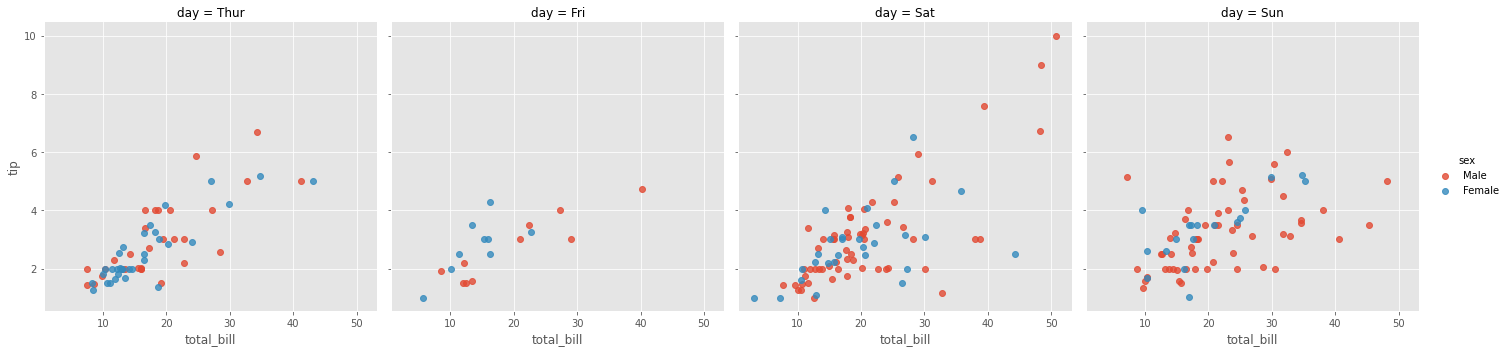

In [116]:
# Example using lmplot (a figure-level function)

fig = sns.lmplot(
    x='total_bill', y='tip', 
    data=tips, fit_reg=False,
    hue='sex', col='day')
plt.show()

facet `row` with `col`

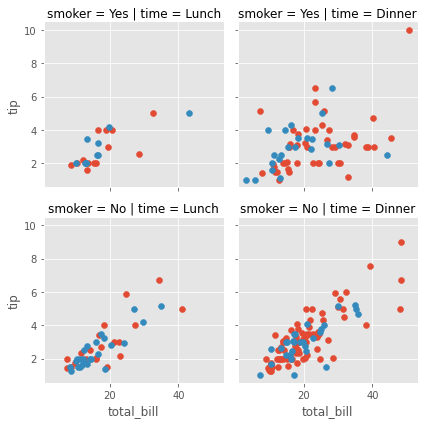

In [117]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')
plt.show()

/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


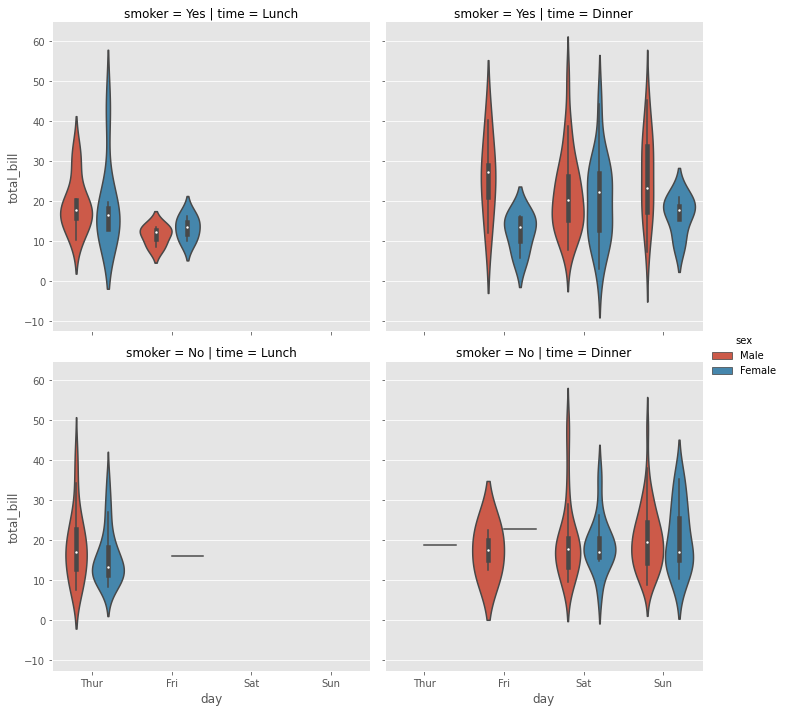

In [118]:
facet = sns.factorplot(
    x='day', y='total_bill',
    hue='sex', data=tips,
    row='smoker', col='time',
    kind='violin'
)